## Lecture 11: Variable exclusion hypothesis test

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import t
from sklearn.linear_model import LinearRegression
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt


In [4]:
n = 1000
p = 50
x = np.random.uniform(-10,10, size=(n, p))

In [5]:
y = 5 * np.sin(x[:, 0]) + t.rvs(100, size=n)

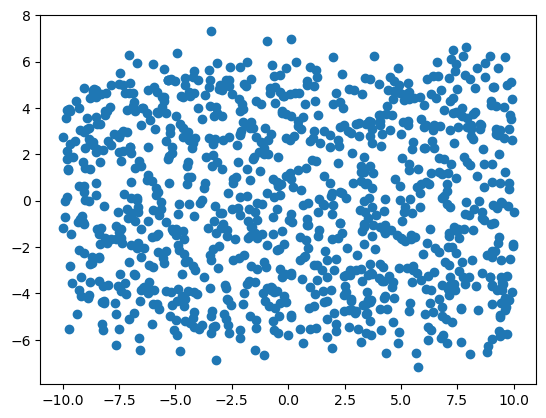

In [ ]:
plt.scatter(x[:, 0], y)

In [9]:
lm = LinearRegression()
lm.fit(x, y)
y_hat = lm.predict(x)
resid = y - y_hat

In [10]:
lm.intercept_

-0.031129601641559864

In [11]:
lm.coef_[0]

0.12275241851483465

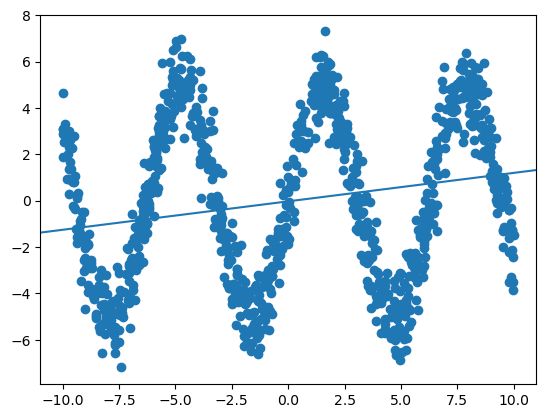

In [12]:
plt.scatter(x[:,0], y)
plt.axline((0,lm.intercept_), slope=lm.coef_[0])

In [13]:
n_train = int(n/2)
x_train = x[:n_train]
x_test = x[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

In [14]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 4
}

# Train the model
num_rounds = 100
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model_with = xgb.train(params, dtrain, num_rounds, eval_list, early_stopping_rounds=10)

[0]	train-rmse:3.06579	eval-rmse:3.15384
[1]	train-rmse:2.63123	eval-rmse:2.70460
[2]	train-rmse:2.34947	eval-rmse:2.44482
[3]	train-rmse:2.06279	eval-rmse:2.15034
[4]	train-rmse:1.86354	eval-rmse:1.96928
[5]	train-rmse:1.68322	eval-rmse:1.78599
[6]	train-rmse:1.55955	eval-rmse:1.68817
[7]	train-rmse:1.39946	eval-rmse:1.55242
[8]	train-rmse:1.31957	eval-rmse:1.49934
[9]	train-rmse:1.21569	eval-rmse:1.40123
[10]	train-rmse:1.15883	eval-rmse:1.36327
[11]	train-rmse:1.08335	eval-rmse:1.32237
[12]	train-rmse:1.05982	eval-rmse:1.32328
[13]	train-rmse:1.03782	eval-rmse:1.32967
[14]	train-rmse:1.01197	eval-rmse:1.30677
[15]	train-rmse:0.99198	eval-rmse:1.31570
[16]	train-rmse:0.95217	eval-rmse:1.29546
[17]	train-rmse:0.92509	eval-rmse:1.30184
[18]	train-rmse:0.90019	eval-rmse:1.29229
[19]	train-rmse:0.87960	eval-rmse:1.29547
[20]	train-rmse:0.86930	eval-rmse:1.29389
[21]	train-rmse:0.84753	eval-rmse:1.29638
[22]	train-rmse:0.83116	eval-rmse:1.29703
[23]	train-rmse:0.81184	eval-rmse:1.30206
[2

/Users/gm845/anaconda3/envs/msds534/lib/python3.11/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


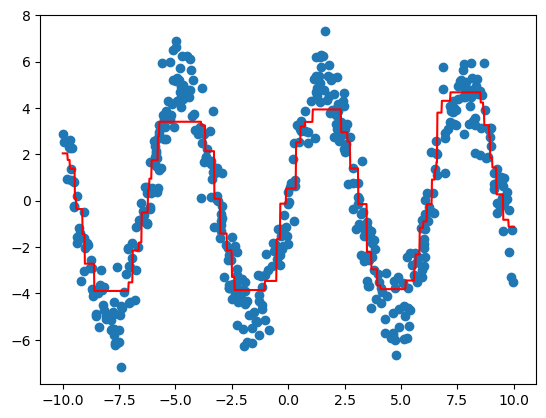

In [15]:
n_lin = 1000
x_linspace = np.linspace(x_train.min(), x_train.max(), n_lin).reshape(n_lin, 1)
x_linspace = np.hstack((x_linspace, np.zeros((n_lin, p-1))))
y_linspace = model_with.predict(xgb.DMatrix(x_linspace))
plt.scatter(x_test[:, 0], y_test)
plt.plot(x_linspace[:, 0], y_linspace, c='red')

In [16]:
# Make predictions
y_pred_with = model_with.predict(dtest)
resid_with = np.power(y_test - y_pred_with, 2)

In [17]:
# now we need to train a model that doesn't use the first X
dtrain = xgb.DMatrix(x_train[:, range(1, p)], label=y_train)
dtest = xgb.DMatrix(x_test[:, range(1, p)], label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 4
}

# Train the model
num_rounds = 100
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model_without = xgb.train(params, dtrain, num_rounds, eval_list, early_stopping_rounds=10)

[0]	train-rmse:3.38562	eval-rmse:3.58182
[1]	train-rmse:3.27215	eval-rmse:3.58817
[2]	train-rmse:3.18158	eval-rmse:3.60336
[3]	train-rmse:3.07648	eval-rmse:3.61636
[4]	train-rmse:3.02346	eval-rmse:3.62349
[5]	train-rmse:2.96182	eval-rmse:3.62697
[6]	train-rmse:2.90257	eval-rmse:3.65252
[7]	train-rmse:2.84208	eval-rmse:3.65978
[8]	train-rmse:2.74793	eval-rmse:3.67123
[9]	train-rmse:2.70818	eval-rmse:3.67110


/Users/gm845/anaconda3/envs/msds534/lib/python3.11/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [18]:
y_pred_without = model_without.predict(dtest)
resid_without = np.power(y_pred_without - y_test, 2)

In [19]:
n_test = y_test.shape[0]

In [20]:
print(f"Mean Test Errors: {resid_with.mean():.4f}")
print(f"Mean Null Test Errors: {resid_without.mean():.4f}")

obs_T = resid_with.mean() - resid_without.mean()

Mean Test Errors: 1.7219
Mean Null Test Errors: 13.5069


In [21]:
# get columns Z | Z_tilde
resid_all = np.hstack((resid_with.reshape(n_test, 1), resid_without.reshape(n_test, 1)))

In [22]:
heads = np.random.choice(np.array((0,1)), size=n_test)

In [23]:
heads

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,

In [ ]:
resamp_with = resid_all[0, heads]
resamp_without = resid_all[0, 1-heads]

In [24]:
n_permutations = 500
resampled_Ts = []

for _ in range(n_permutations):
    heads = np.random.choice(np.array((0,1)), size=n_test)

    resamp_with = resid_all[range(n_test), heads]
    resamp_without = resid_all[range(n_test), 1-heads]
    # test error using X - test error not using X
    resampled_T = np.mean(resamp_with) - np.mean(resamp_without)
    resampled_Ts.append(resampled_T)

## Calculate p-value
p_value = sum([1 for t in resampled_Ts if t <= obs_T]) / n_permutations

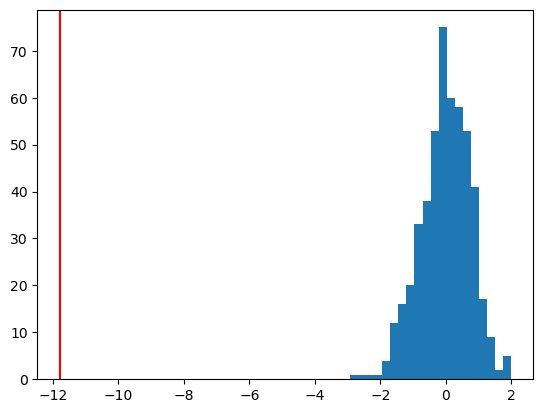

P-Value: 0.0000


In [25]:
resampled_Ts = np.array(resampled_Ts)
plt.hist(resampled_Ts, bins=20)
plt.axvline(obs_T, color='red')
plt.show()

print(f"P-Value: {p_value:.4f}")


In [26]:
j = 1
x_js = np.array([i for i in range(p) if i != j])

In [27]:
x_js

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [28]:
dtrain = xgb.DMatrix(x_train[:, x_js], label=y_train)
dtest = xgb.DMatrix(x_test[:, x_js], label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 4
}

# Train the model
num_rounds = 100
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model_without = xgb.train(params, dtrain, num_rounds, eval_list, early_stopping_rounds=10)

y_pred_without = model_without.predict(dtest)
resid_without = np.power(y_pred_without - y_test, 2)

[0]	train-rmse:3.06579	eval-rmse:3.15384
[1]	train-rmse:2.63123	eval-rmse:2.70460
[2]	train-rmse:2.34947	eval-rmse:2.44482
[3]	train-rmse:2.06279	eval-rmse:2.15034
[4]	train-rmse:1.86354	eval-rmse:1.96928
[5]	train-rmse:1.68322	eval-rmse:1.78599
[6]	train-rmse:1.55955	eval-rmse:1.68817
[7]	train-rmse:1.39946	eval-rmse:1.55242
[8]	train-rmse:1.31957	eval-rmse:1.49934
[9]	train-rmse:1.21569	eval-rmse:1.40123
[10]	train-rmse:1.15883	eval-rmse:1.36327
[11]	train-rmse:1.08335	eval-rmse:1.32237
[12]	train-rmse:1.05982	eval-rmse:1.32328
[13]	train-rmse:1.03782	eval-rmse:1.32921
[14]	train-rmse:1.01197	eval-rmse:1.30644
[15]	train-rmse:0.99198	eval-rmse:1.31499
[16]	train-rmse:0.95217	eval-rmse:1.29471
[17]	train-rmse:0.92509	eval-rmse:1.30108
[18]	train-rmse:0.90019	eval-rmse:1.29151
[19]	train-rmse:0.87960	eval-rmse:1.29469
[20]	train-rmse:0.86930	eval-rmse:1.29310
[21]	train-rmse:0.84753	eval-rmse:1.29555
[22]	train-rmse:0.83116	eval-rmse:1.29623
[23]	train-rmse:0.81184	eval-rmse:1.30125
[2

/Users/gm845/anaconda3/envs/msds534/lib/python3.11/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [30]:
print(f"Mean Test Errors: {resid_with.mean():.4f}")
print(f"Mean Null Test Errors: {resid_without.mean():.4f}")

obs_T = resid_with.mean() - resid_without.mean()

Mean Test Errors: 1.7219
Mean Null Test Errors: 1.7136


In [31]:
resid_all = np.hstack((resid_with.reshape(n_test, 1), resid_without.reshape(n_test, 1)))

n_permutations = 1000
resampled_Ts = []

for _ in range(n_permutations):
    heads = np.random.choice(np.array((0,1)), size=n_test)

    resamp_with = resid_all[range(n_test), heads]
    resamp_without = resid_all[range(n_test), 1-heads]
    # test error using X - test error not using X
    resampled_T = np.mean(resamp_with) - np.mean(resamp_without)
    resampled_Ts.append(resampled_T)

## Calculate p-value
p_value = sum([1 for t in resampled_Ts if t <= obs_T]) / n_permutations

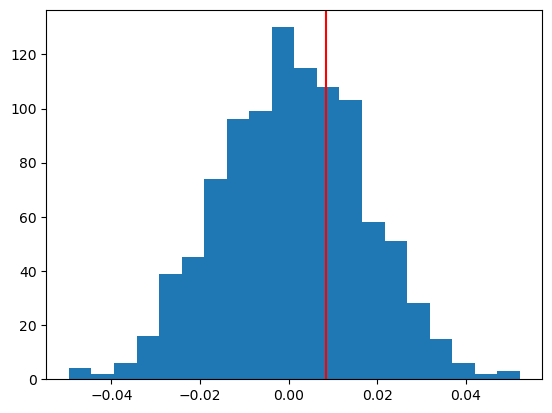

P-Value: 0.6700


In [32]:
resampled_Ts = np.array(resampled_Ts)
plt.hist(resampled_Ts, bins=20)
plt.axvline(obs_T, color='red')
plt.show()

print(f"P-Value: {p_value:.4f}")